In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

from sklearn.preprocessing import MinMaxScaler

In [2]:
# mysql username, password, and database name
MYSQL_ADDRESS = '127.0.0.1'

MYSQL_PORT = '3306'
MYSQL_USERNAME = 'vegas'
MYSQL_PASSWORD = 'VrichCrich99'
MYSQL_DBNAME = 'univers'


mysql_str = ('mysql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=MYSQL_USERNAME, password=MYSQL_PASSWORD, ipaddress=MYSQL_ADDRESS, port=MYSQL_PORT, dbname=MYSQL_DBNAME))
engine = create_engine(mysql_str)

In [3]:
appstech_labs_id = 1
df = pd.read_sql_query(f"SELECT * FROM user_sales_table where business_id='{appstech_labs_id}'", engine, index_col='txn_date', parse_dates=['txn_date'])
df.head()

,Id,business_id,source,customer_name,customer_id,sales_type,gross_amount,gross_cost,margin,discount_amount,...,business_currency,business_currency_symbol,txn_currency,txn_currency_symbol,due_date,exchange_rate,active,created_on,updated_on,deleted_on
txn_date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,9,1,quickbooks,Amy's Bird Sanctuary,1,INVOICE,100.00,0.0,100.00,0.0,...,USD,$,USD,$,2020-09-30,1.0,1,2020-11-13 14:17:04,2020-11-13 14:17:15,None
2020-05-19,10,1,quickbooks,Bill's Windsurf Shop,2,INVOICE,175.00,0.0,175.00,0.0,...,USD,$,USD,$,2020-06-18,1.0,1,2020-11-13 14:17:04,2020-11-13 14:17:15,None
2020-08-29,11,1,quickbooks,Dylan Sollfrank,6,SALE,338.00,0.0,338.00,0.0,...,USD,$,USD,$,NaT,1.0,1,2020-11-13 14:17:04,2020-11-13 14:17:15,None
2020-08-22,12,1,quickbooks,Cool Cars,3,INVOICE,2194.48,28.0,2166.48,0.0,...,USD,$,USD,$,2020-09-21,1.0,1,2020-11-13 14:17:04,2020-11-13 14:17:15,None
2020-08-25,13,1,quickbooks,55 Twin Lane,9,INVOICE,50.00,0.0,50.00,0.0,...,USD,$,USD,$,2020-09-24,1.0,1,2020-11-13 14:17:04,2020-11-13 14:17:15,None


In [4]:
df.shape

(35, 21)

In [5]:
threshold = 0.7
df.isna().sum()

Id                           0
business_id                  0
source                       0
customer_name                0
customer_id                  0
sales_type                   0
gross_amount                 0
gross_cost                   0
margin                       0
discount_amount              0
tax_amount                   0
business_currency            0
business_currency_symbol     0
txn_currency                 0
txn_currency_symbol          0
due_date                     4
exchange_rate                0
active                       0
created_on                   0
updated_on                   0
deleted_on                  35
dtype: int64

In [6]:
df = df[df.columns[df.isna().mean() < threshold]]
df = df.loc[df.isna().mean(axis=1) < threshold]

df.tail()

,Id,business_id,source,customer_name,customer_id,sales_type,gross_amount,gross_cost,margin,discount_amount,tax_amount,business_currency,business_currency_symbol,txn_currency,txn_currency_symbol,due_date,exchange_rate,active,created_on,updated_on
txn_date,,,,,,,,,,,,,,,,,,,,
2020-09-02,103,1,quickbooks,Geeta Kalapatapu,10,INVOICE,582.40,145.0,437.40,0.0,46.60,USD,$,USD,$,2020-10-02,1.0,1,2020-11-13 14:17:04,2020-11-13 14:17:15
2020-09-02,106,1,quickbooks,Rondonuwu Fruit and Vegi,21,INVOICE,75.40,0.0,75.40,0.0,3.60,USD,$,USD,$,2020-10-02,1.0,1,2020-11-13 14:17:04,2020-11-13 14:17:15
2020-09-03,119,1,quickbooks,Mark Cho,17,INVOICE,290.72,137.0,153.72,0.0,23.28,USD,$,USD,$,2020-10-03,1.0,1,2020-11-13 14:17:04,2020-11-13 14:17:15
2020-09-03,129,1,quickbooks,0969 Ocean View Road,8,INVOICE,478.00,135.0,343.00,0.0,0.00,USD,$,USD,$,2020-10-03,1.0,1,2020-11-13 14:17:04,2020-11-13 14:17:15
2020-09-03,130,1,quickbooks,Sonnenschein Family Store,24,INVOICE,335.18,135.0,200.18,0.0,26.82,USD,$,USD,$,2020-10-03,1.0,1,2020-11-13 14:17:04,2020-11-13 14:17:15


In [7]:
upper_lim = df["gross_amount"].quantile(.95)
lower_lim = df["gross_amount"].quantile(.05)

print(f"upper limit {upper_lim} vs lower limit {lower_lim}")
df = df[(df["gross_amount"] < upper_lim) & (df["gross_amount"] > lower_lim)]

upper limit 811.4999999999994 vs lower limit 73.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2020-08-31 to 2020-09-03
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        31 non-null     int64         
 1   business_id               31 non-null     int64         
 2   source                    31 non-null     object        
 3   customer_name             31 non-null     object        
 4   customer_id               31 non-null     object        
 5   sales_type                31 non-null     object        
 6   gross_amount              31 non-null     float64       
 7   gross_cost                31 non-null     float64       
 8   margin                    31 non-null     float64       
 9   discount_amount           31 non-null     float64       
 10  tax_amount                31 non-null     float64       
 11  business_currency         31 non-null     object        
 12  busi

In [9]:
numeric_feats = df.dtypes[df.dtypes != "object"].index
numeric_feats = df[numeric_feats].dtypes[df.dtypes != "datetime64[ns]"].index
numeric_feats = df[numeric_feats].dtypes[df.dtypes != "int64"].index

imp_feats = []

cormat = df[numeric_feats].corr().fillna(0)

for feat in numeric_feats:
    try:
        if cormat[feat][0] > 0.2:
            imp_feats.append(feat)
    except:
        pass
        

df = df[imp_feats]
df

,gross_amount,gross_cost,margin,tax_amount
txn_date,,,,
2020-08-31,100.00,0.0,100.00,8.00
2020-05-19,175.00,0.0,175.00,0.00
2020-08-29,338.00,0.0,338.00,0.00
2020-07-26,79.60,0.0,79.60,6.40
2020-08-09,750.00,0.0,750.00,0.00
2020-08-09,225.00,0.0,225.00,0.00
2020-08-31,104.00,0.0,104.00,0.00
2020-09-01,375.00,0.0,375.00,0.00
2020-09-01,79.00,0.0,79.00,0.00


In [17]:
df = df.resample("D").sum()
df = df.loc[df["gross_amount"] > 0]

In [18]:
df

,gross_amount,gross_cost,margin,tax_amount
txn_date,,,,
2020-05-19,391.50,0.0,391.50,10.50
2020-06-19,365.00,125.0,240.00,22.00
2020-06-26,156.00,81.0,75.00,0.00
2020-07-16,75.00,0.0,75.00,0.00
2020-07-17,786.60,125.0,661.60,44.40
2020-07-26,79.60,0.0,79.60,6.40
2020-08-09,975.00,0.0,975.00,0.00
2020-08-12,500.00,125.0,375.00,40.00
2020-08-18,80.00,0.0,80.00,0.00


In [13]:
data = pd.DataFrame(df["gross_amount"])
data["log+1"] = (data["gross_amount"] + 1).transform(np.log)
data["log(x-min(x)+1)"] = (data["gross_amount"] - data["gross_amount"].min() + 1).transform(np.log)

data["inverse_log"] = (data["log(x-min(x)+1)"]).transform(np.exp) + data["gross_amount"].min() - 1
data

df["gross_amount"] = (df["gross_amount"] - df["gross_amount"].min() + 1).transform(np.log)

_scaler = MinMaxScaler()
df["gross_amount"] = _scaler.fit_transform(df["gross_amount"].values.reshape(-1, 1))
df.head()

,gross_amount,gross_cost,margin,tax_amount
txn_date,,,,
2020-05-19,0.830373,0.0,391.5,10.5
2020-06-19,0.817810,125.0,240.0,22.0
2020-06-26,0.635229,81.0,75.0,0.0
2020-07-16,0.000000,0.0,75.0,0.0
2020-07-17,0.946910,125.0,661.6,44.4


In [19]:
df.to_csv("../universe_dataset.csv")

In [15]:
dataset = df.values
dataset.shape

(18, 4)

In [16]:
def split_sequences(data, look_back:int=3):
    x, y = list(), list()
    
    for i in range(len(data)):
        end_start = i + look_back
        
        if end_start >= len(data):
            break
        
        x.append(data[i:end_start, -1])
        y.append(data[end_start-1, -1])
        
        end_start += 1
    
    return np.array(x), np.array(y)

X, y = split_sequences(dataset)
# X = X.reshape(-1, X.shape[1]*X.shape[2])
# X = X.reshape(-1, 1, X.shape[1])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(15, 3) (15, 1)


In [17]:
X.ndim

2

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import TimeSeriesSplit, train_test_split

from sklearn.metrics import r2_score

In [22]:
# tscv = TimeSeriesSplit(n_splits=2)

# for train_index, test_index in tscv.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.25)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11, 3), (11, 1), (4, 3), (4, 1))

In [24]:
X_train_test = np.concatenate((X_train, X_test))
y_train_test = np.concatenate((y_train, y_test))
X_train_test.shape, y_train.shape

((15, 3), (11, 1))

In [18]:
# pd.DataFrame(data={"gross_amount-2": X_train[:, 0], "gross_amount-1": X_train[:, 1], "gross_amount": X_train[:, 2], "gross_amount+1": y_train[:, 0]})

In [19]:
# pd.DataFrame(data={"gross_amount-2": X_test[:, 0], "gross_amount-1": X_test[:, 1], "gross_amount": X_test[:, 2], "gross_amount+1": y_test[:, 0]})

In [32]:
# model = Sequential()
# model.add(Dense(50, input_shape=(X_train.shape[1],)))
# model.add(Dense(50))
# model.add(Dense(100))
# model.add(Dense(y_train.shape[1]))
# model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(LSTM(50, activation="linear"))
# model.add(Dense(100))
# model.add(Dense(y_train.shape[1]))

# model.compile(loss="mape", optimizer="adam", metrics=["mape"])
# model.compile(optimizer="adam", loss="mse")
# model.fit(X_train, y_train, batch_size=5, epochs=80, verbose=1, shuffle=False, validation_data=(X_test, y_test))

In [29]:
def get_model_accuracy(model):
    prediction = list()
    history = [x for x in X_train]
    
#     for i in range(len(X_test)):
#         input_data = history[-1]
#         print(input_data)
#         input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1])
        
#         yhat = model.predict(input_data)
#         prediction.append(yhat)
        
#         history.append(X_test[i])
    
    prediction = model.predict(X_test)
#     prediction = np.array(prediction)
#     prediction = prediction.reshape(prediction.shape[0], prediction.shape[1] * prediction.shape[2])
    
    df_test = pd.DataFrame(data={"actual": y_test[:, 0], "predicted": prediction[:, 0]})
    
    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((prediction - y_test) ** 2)))
    print(f"\nRoot Mean Square Error {rmse}")
    
    return r2_score(y_true=y_test, y_pred=prediction), df_test

In [30]:
score, df_ = get_model_accuracy(model)
print(f"accuracy = {round(score, 2)}\n")
df_


Root Mean Square Error 0.010076500487964485
accuracy = 1.0



,actual,predicted
0,0.00,0.012088
1,38.72,38.721626
2,0.00,0.000765
3,50.20,50.183975


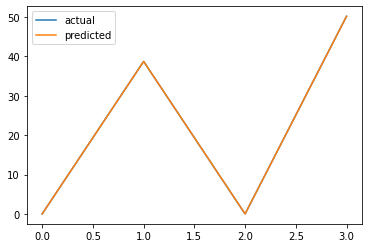

In [31]:
df_.plot()
plt.show()

In [24]:
# model.predict(X_train[-2].reshape(1, X_test[-1].shape[0], X_test[-1].shape[1]))
# model.predict(X_train[-2].reshape(1, X_train[-2].shape[0]))